In [37]:
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
df = pd.read_csv("SPX.csv")
df["Dates"] = pd.to_datetime(df["Dates"])

In [14]:
df.head()

,Dates,Open,Close
0,2023-05-19 09:30:00,4204.15,4211.47
1,2023-05-19 10:00:00,4211.59,4211.38
2,2023-05-19 10:30:00,4211.24,4209.03
3,2023-05-19 11:00:00,4209.00,4191.72
4,2023-05-19 11:30:00,4191.48,4191.13


In [32]:
df_open = df.loc[df.groupby(df.Dates.dt.date, as_index=False).Dates.idxmin().Dates, ["Dates", "Open"]]
df_open.rename(columns={"Dates": "Open Time"}, inplace=True)
df_open["Dates"] = df_open["Open Time"].dt.date
df_open.set_index("Dates", inplace=True)
df_open.head()

,Open Time,Open
Dates,,
2023-05-19,2023-05-19 09:30:00,4204.15
2023-05-22,2023-05-22 09:30:00,4190.78
2023-05-23,2023-05-23 09:30:00,4176.80
2023-05-24,2023-05-24 09:30:00,4132.96
2023-05-25,2023-05-25 09:30:00,4155.71


In [33]:
df_close = df.loc[df.groupby(df.Dates.dt.date, as_index=False).Dates.idxmax().Dates, ["Dates", "Close"]]
df_close.rename(columns={"Dates": "Close Time"}, inplace=True)
df_close["Dates"] = df_close["Close Time"].dt.date
df_close.set_index("Dates", inplace=True)
df_close.head()

,Close Time,Close
Dates,,
2023-05-19,2023-05-19 16:00:00,4191.98
2023-05-22,2023-05-22 16:00:00,4192.63
2023-05-23,2023-05-23 16:00:00,4145.58
2023-05-24,2023-05-24 16:00:00,4115.24
2023-05-25,2023-05-25 16:00:00,4151.28


In [35]:
df_bar = pd.merge(left=df_open, right=df_close, left_index=True, right_index=True, how="inner")
df_bar["IntradayRet"] = df_bar["Close"] / df_bar["Open"] - 1
df_bar.head()

,Open Time,Open,Close Time,Close,IntradayRet
Dates,,,,,
2023-05-19,2023-05-19 09:30:00,4204.15,2023-05-19 16:00:00,4191.98,-0.002895
2023-05-22,2023-05-22 09:30:00,4190.78,2023-05-22 16:00:00,4192.63,0.000441
2023-05-23,2023-05-23 09:30:00,4176.80,2023-05-23 16:00:00,4145.58,-0.007475
2023-05-24,2023-05-24 09:30:00,4132.96,2023-05-24 16:00:00,4115.24,-0.004287
2023-05-25,2023-05-25 09:30:00,4155.71,2023-05-25 16:00:00,4151.28,-0.001066


In [36]:
df_bar.to_csv("SPX_daily_bar.csv")

<Axes: xlabel='Dates'>

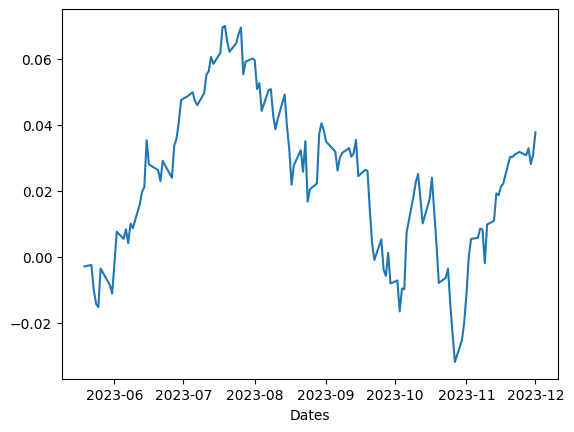

In [39]:
((df_bar["IntradayRet"] + 1).cumprod() - 1).plot()